#### **Week 6: ANOVA Analysis Part II**

**Objective**: 
Gain hands-on experience with ANOVA analysis, understanding its assumptions, and applying it to real-world datasets to understand differences among group means.

**Instructions**:



#### **1. Data Preparation:**
- Use the dataset from the power point slides that we did not cover in class (2nd one).
- Download the dataset into a Jupyter notebook or a Python/R file.
- For this assignment, you can use either Python or R. For practice, I recommend using both and having/submitting two separate files or notebooks: one for python and one for R.
- Create a subset of the data that includes only the variables of interest.
- Ensure the data types are appropriate: numbers should be numerical and categories should be strings.



In [2]:
!pip install ucimlrepo

Load packages and the database


In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

Diabetes = fetch_ucirepo(id=296)

c:\Users\Xavier\AppData\Local\Programs\Python\Python310\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Create a dataframe from the database

In [4]:
x = Diabetes.data.features
y = Diabetes.data.targets

df = pd.concat([x,y], axis=1)

df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Clean the column names

Create a subset with the Race, Length of Stay, and A1C 

In [6]:
subdf = df[['race', 'time_in_hospital', 'A1Cresult']]
subdf.sample(10)

,race,time_in_hospital,A1Cresult
97322,Caucasian,11,None
21294,Caucasian,4,Norm
26422,Caucasian,4,None
62400,Caucasian,1,None
59013,Caucasian,4,None
66251,Caucasian,8,None
41159,Caucasian,2,None
89505,AfricanAmerican,12,None
81153,Caucasian,5,Norm
14445,Caucasian,4,None


Check for missingness

In [7]:
missing = subdf.isnull().sum()
print(missing)

race                2273
time_in_hospital       0
A1Cresult              0
dtype: int64


In [8]:
subdf = subdf.dropna()


drop missing values

In [9]:
missing

race                2273
time_in_hospital       0
A1Cresult              0
dtype: int64

#### **2. Assumption Checks:**
- Before conducting the ANOVA, check the following assumptions:
  - **Normality**: Test for the normal distribution of your dependent variable within each group using suitable statistical tests (e.g., Shapiro-Wilk). 
    - **Interpretation**: Please interpret the p-value from the test.
  - **Homoscedasticity (Equal Variances)**: Check if the variances of the different groups are equal using the Levene's test.
    - **Interpretation**: Please interpret the p-value from the test.



1. Dependent Variable (dv): Length of Hospital Stay ('time_in_hospital')
This is a variable subject to change and is dependent on factors.
2. Independent Variable #1 (iv1): Race ('race')
Healthcare Equity and Equality are important, testing for variance based on race will provide intresting insights
3. Independent Variable #2 (iv2): A1C Test Result ('a1cresult')
One can assume that higher A1C Results should increase length of stay but i'd like to see if the theoretical assumptions match the actual results


In [10]:
from scipy import stats

groups = subdf.groupby(['race', 'A1Cresult'])

for (race, a1C), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])
    print(f"Group ({race}, {a1C}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}")
    if p_value >= 0.05:
        print(f'This is normally distributed\n')
    else: 
        print(f'This is not normally distributed\n')


     


Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16
This is not normally distributed

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34
This is not normally distributed

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0
This is not normally distributed

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25
This is not normally distributed

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056
This is not normally distributed

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05
This is not normally distributed

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21
This is not normally distributed

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097
This is not normally distributed

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38
This is not normally distributed

c:\Users\Xavier\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
import matplotlib.pyplot as plt


As a result of the Shapiro test, none of the groups are normally distributed as their P values are all less than 0.05

In [11]:
stats.levene(
    subdf['time_in_hospital'][subdf['race'] == 'AfricanAmerican'][subdf['A1Cresult'] == '>7'],
    subdf['time_in_hospital'][subdf['race'] == 'AfricanAmerican'][subdf['A1Cresult'] == '>8'],
    subdf['time_in_hospital'][subdf['race'] == 'AfricanAmerican'][subdf['A1Cresult'] == 'None'],
    subdf['time_in_hospital'][subdf['race'] == 'AfricanAmerican'][subdf['A1Cresult'] == 'Norm'],
    subdf['time_in_hospital'][subdf['race'] == 'Asian'][subdf['A1Cresult'] == '>7'],
    subdf['time_in_hospital'][subdf['race'] == 'Asian'][subdf['A1Cresult'] == '>8'],
    subdf['time_in_hospital'][subdf['race'] == 'Asian'][subdf['A1Cresult'] == 'None'],
    subdf['time_in_hospital'][subdf['race'] == 'Asian'][subdf['A1Cresult'] == 'Norm'],
    subdf['time_in_hospital'][subdf['race'] == 'Caucasian'][subdf['A1Cresult'] == '>7'],
    subdf['time_in_hospital'][subdf['race'] == 'Caucasian'][subdf['A1Cresult'] == '>8'],
    subdf['time_in_hospital'][subdf['race'] == 'Caucasian'][subdf['A1Cresult'] == 'None'],
    subdf['time_in_hospital'][subdf['race'] == 'Caucasian'][subdf['A1Cresult'] == 'Norm'],
    subdf['time_in_hospital'][subdf['race'] == 'Hispanic'][subdf['A1Cresult'] == '>7'],
    subdf['time_in_hospital'][subdf['race'] == 'Hispanic'][subdf['A1Cresult'] == '>8'],
    subdf['time_in_hospital'][subdf['race'] == 'Hispanic'][subdf['A1Cresult'] == 'None'],
    subdf['time_in_hospital'][subdf['race'] == 'Hispanic'][subdf['A1Cresult'] == 'Norm'],
    subdf['time_in_hospital'][subdf['race'] == 'Other'][subdf['A1Cresult'] == '>7'],
    subdf['time_in_hospital'][subdf['race'] == 'Other'][subdf['A1Cresult'] == '>8'],
    subdf['time_in_hospital'][subdf['race'] == 'Other'][subdf['A1Cresult'] == 'None'],
    subdf['time_in_hospital'][subdf['race'] == 'Other'][subdf['A1Cresult'] == 'Norm']
)

LeveneResult(statistic=7.450102003925801, pvalue=9.580811219790571e-21)

The P value is less than 0.05 which indicates that there is enough evidence to reject the null hypothesis and that there is significant variance amongst the groups. 

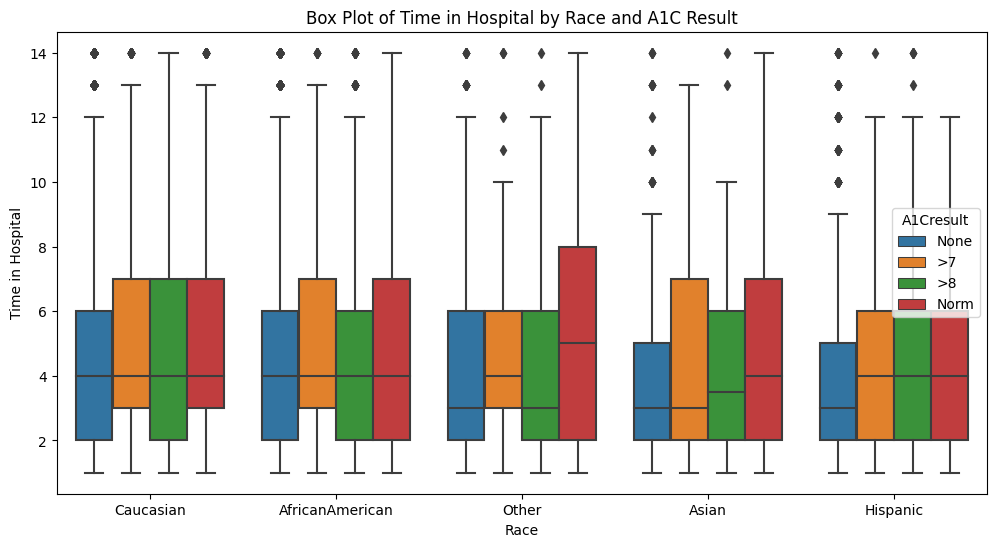

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='time_in_hospital', hue='A1Cresult', data=subdf)
plt.title("Box Plot of Time in Hospital by Race and A1C Result")
plt.xlabel("Race")
plt.ylabel("Time in Hospital")
plt.show()


#### **3. Conduct the ANOVA:**
- Using the stats package or a similar library, conduct the one-way ANOVA on your data.
- Interpret the p-value from the test and what the results mean.



In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data = subdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                             sum_sq       df           F        PR(>F)
C(race)                  641.735130      4.0   18.075566  7.501203e-15
C(A1Cresult)            3895.231358      3.0  146.287793  1.363867e-94
C(race):C(A1Cresult)     276.823623     12.0    2.599070  1.845652e-03
Residual              882895.150091  99473.0         NaN           NaN


The P value for both the Race and A1C results are less than 0.05 which implies that they have a significant impact on the Time spent in the hospital.

#### **4. Post-hoc Test (if necessary):**
- If your ANOVA result is significant, follow up with a Tukey post-hoc test to determine which groups differ from each other.
- Interpret the result of the Tukey test, highlighting which groups have significant differences.



In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(subdf['time_in_hospital'], subdf['race'] + subdf['A1Cresult'])
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
  AfricanAmerican>7   AfricanAmerican>8  -0.2941  0.884 -0.8039  0.2156  False
  AfricanAmerican>7 AfricanAmericanNone  -0.4521 0.0531 -0.9065  0.0024  False
  AfricanAmerican>7 AfricanAmericanNorm  -0.0552    1.0 -0.6031  0.4927  False
  AfricanAmerican>7             Asian>7   -0.381    1.0 -2.1964  1.4345  False
  AfricanAmerican>7             Asian>8  -0.6346 0.9901 -2.0478  0.7787  False
  AfricanAmerican>7           AsianNone  -1.0728    0.0 -1.7207 -0.4249   True
  AfricanAmerican>7           AsianNorm   0.2804    1.0 -1.5118  2.0727  False
  AfricanAmerican>7         Caucasian>7    0.011    1.0 -0.4758  0.4978  False
  AfricanAmerican>7         Caucasian>8    -0.09    1.0 -0.5582  0.3782  False
  AfricanAmerican>7       CaucasianNone  -0.6178 0.0